In [27]:
import torch
import os
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from mini_imagenet_dataset import MiniImageNetDataset


In [28]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    print("MPS device not found.")
print('Device:', device)


Device: mps


In [29]:
train_dataset = MiniImageNetDataset(root_dir=os.getcwd(), phase='train', shuffle_images=True)
val_dataset = MiniImageNetDataset(root_dir=os.getcwd(), phase='val', shuffle_images=True)
test_dataset = MiniImageNetDataset(root_dir=os.getcwd(), phase='test', shuffle_images=True)

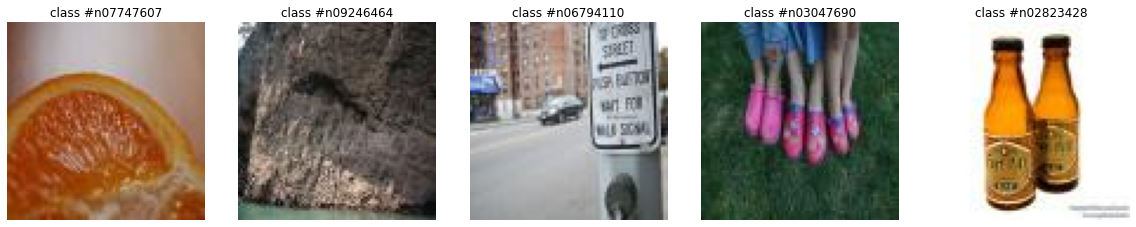

total number of training set: 38400


In [30]:
idx = np.random.choice(range(len(train_dataset)), 5, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = train_dataset[idx[i]]
    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of training set: {}'.format(len(train_dataset)))
# for i in range(len(train_dataset.label_names)):
#     print('numer of images for class {}: {}'.format(train_dataset.label_names[i], len([label for _, label in train_dataset.data if label == train_dataset.label_names[i]])))

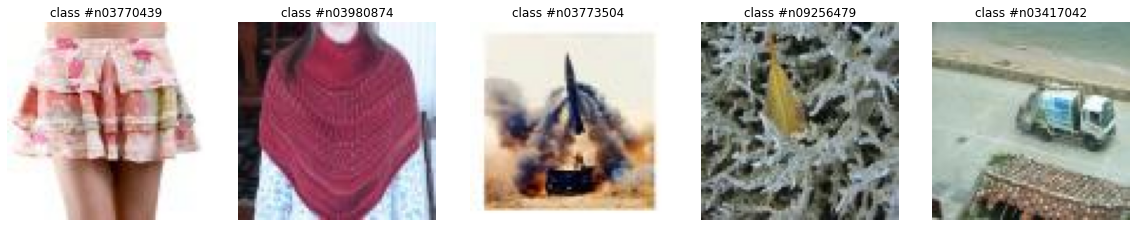

total number of training set: 9600


In [31]:
idx = np.random.choice(range(len(val_dataset)), 5, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = val_dataset[idx[i]]
    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of training set: {}'.format(len(val_dataset)))
# for i in range(len(val_dataset.label_names)):
#     print('numer of images for class {}: {}'.format(val_dataset.label_names[i], len([label for _, label in val_dataset.data if label == val_dataset.label_names[i]])))

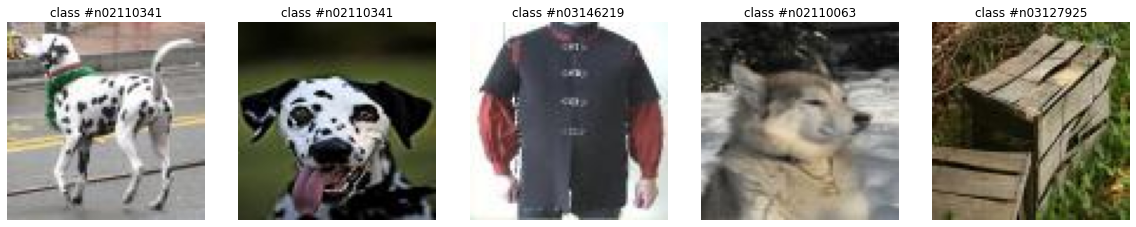

total number of training set: 12000


In [32]:
idx = np.random.choice(range(len(test_dataset)), 5, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = test_dataset[idx[i]]
    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of training set: {}'.format(len(test_dataset)))
# for i in range(len(test_dataset.label_names)):
#     print('numer of images for class {}: {}'.format(test_dataset.label_names[i], len([label for _, label in test_dataset.data if label == test_dataset.label_names[i]])))

In [33]:
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = MiniImageNetDataset(root_dir=os.getcwd(), phase='train', shuffle_images=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)

val_dataset = MiniImageNetDataset(root_dir=os.getcwd(), phase='val', shuffle_images=True, transform=transform)
validation_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0)

test_dataset = MiniImageNetDataset(root_dir=os.getcwd(), phase='test', shuffle_images=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0)